In [331]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats

In [448]:
# Load the data from JHU
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_d = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [449]:
df.tail(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0,0.0,...,274,274,303,344,501,483,533,648,677,915
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,21
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,...,103,103,103,103,103,103,103,103,103,103


In [450]:
df_d.tail(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0,0.0,...,0,0,0,5,4,4,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,...,3,3,3,3,3,3,3,3,3,3


In [451]:
df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2' ,'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_d = df_d.drop(['Population', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2' ,'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)

In [452]:
df.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,58,69,77,82,84,93,112,113,121,121
2,0,0,0,0,0,0,0,0,0,0,...,0,2,6,6,6,6,6,6,6,6
3,0,0,0,0,0,0,0,0,0,0,...,174,239,286,316,316,452,475,513,573,620
4,0,0,0,0,0,0,0,0,0,0,...,30,30,30,30,37,40,42,43,43,45


In [453]:
# this cell by Leaf Petersen
# Copy the data frame
dfdaily=df.copy()

# We are on the first iteration
first=True
# For every column
for column in df:
   # If this is the first iteration
   if first:
     # Save the first column
     prev = column
     # Copy over the first column unchanged
     dfdaily[column]=df[column]
     # All subsequent iterations are not the first
     first=False
     # Skip the rest of the loop
     continue
   # We are not the first iteration, so keep going
   # Set the new column contents to the difference of the
   # previous column and the current column
   dfdaily[column] = df[column]-df[prev]
   # The current column is the previous column for the next iteration
   prev = column
dfdaily.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,11,8,5,2,9,19,1,8,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,4,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,47,65,47,30,0,136,23,38,60,47
4,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,7,3,2,1,0,2


In [454]:
# this cell by Leaf Petersen
# Copy the data frame
df_d_daily=df_d.copy()

# We are on the first iteration
first=True
# For every column
for column in df_d:
   # If this is the first iteration
   if first:
     # Save the first column
     prev = column
     # Copy over the first column unchanged
     df_d_daily[column]=df_d[column]
     # All subsequent iterations are not the first
     first=False
     # Skip the rest of the loop
     continue
   # We are not the first iteration, so keep going
   # Set the new column contents to the difference of the
   # previous column and the current column
   df_d_daily[column] = df_d[column]-df_d[prev]
   # The current column is the previous column for the next iteration
   prev = column
df_d_daily.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,3,2,3,1,3,3,2,1,2,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [455]:
dfdaily = dfdaily.sum().to_frame()
dfdaily = dfdaily.reset_index()
dfdaily = dfdaily.rename(columns={'index': 'Date', 0: 'Confirmed'})
dfdaily.tail(5)

,Date,Confirmed
73,4/4/20,33266
74,4/5/20,28217
75,4/6/20,29595
76,4/7/20,29561
77,4/8/20,32826


In [456]:
df_d_daily = df_d_daily.sum().to_frame()
df_d_daily = df_d_daily.reset_index()
df_d_daily = df_d_daily.rename(columns={'index': 'Date', 0: 'Deaths'})
df_d_daily.head(5)

,Date,Deaths
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [425]:
# us_df.date = pd.to_datetime(us_df.date, format="%Y%m%d")
# us_df = us_df.set_index('date').sort_index()
# us_df = us_df.reset_index()
# us_df = us_df[['date','positive', 'negative', 'pending', 'death', 'total']]

In [459]:
dfdaily_avg = dfdaily.copy()
dfdaily_avg = dfdaily.rolling(2, win_type='triang').sum().round()
# Pass the row elements as key value pairs to append() function 
dfdaily_avg.iloc[0] = [1]
dfdaily_avg = dfdaily_avg.reset_index()
dfdaily_avg = dfdaily_avg.rename(columns={'index': 'Date'})
dfdaily_avg.head(5)

,Date,Confirmed
0,0,1.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,2.0


In [460]:
dfdaily_avg.tail(15)

,Date,Confirmed
63,63,11058.0
64,64,15050.0
65,65,17940.0
66,66,18814.0
67,67,19626.0
68,68,20183.0
69,69,23632.0
70,70,25766.0
71,71,27795.0
72,72,31110.0


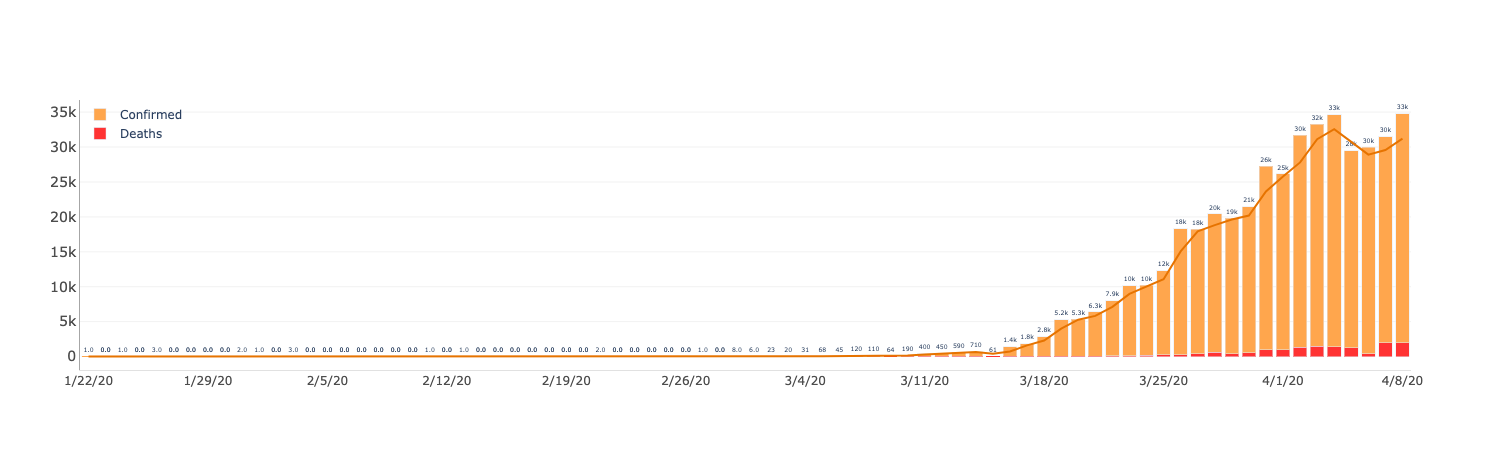

In [462]:
import plotly.graph_objects as go

# con = us_df['positive']
# dea = us_df['death']

fig = go.Figure()

fig.add_trace(go.Bar(x = df_d_daily['Date'], y = df_d_daily['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333'     
                    )
             )

fig.add_trace(go.Bar(x = dfdaily['Date'], y = dfdaily['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d'
                    )
             )

fig.update_layout(barmode='stack',
                  paper_bgcolor='rgba(0,0,0,0)', 
                  plot_bgcolor='rgba(0,0,0,0)',
                  uniformtext_minsize=6, uniformtext_mode='hide',
                  hovermode='x', #sets the bar chart to display both tooltips by default
                  legend=dict(x=0, y=1),
                  #font=dict(size = 12),
                  dragmode=False, #disable panning so mobile apps can receive pinch to zoom events
                  yaxis = dict(
                      scaleanchor = "x",
                      scaleratio = 1,
                              )
                 )
                 
                     
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='#a6a6a6', color='#4d4d4d',
                #showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                fixedrange=True,
                #tickfont = dict(size = 10),
                tickmode='auto',
                nticks=12
                )
              
fig.update_yaxes(showline=True, linewidth=1, linecolor='#a6a6a6', color='#4d4d4d',
                 showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                 fixedrange=True,
                 tickfont = dict(size = 14),
                )


fig.update_traces(texttemplate='%{y:,.2s}', textposition='outside')


    
fig.add_trace(go.Scatter(x = dfdaily['Date'], y = dfdaily_avg['Confirmed'],
                    mode='lines',
                    name='',
                    line=dict(color=' #e67300', width=2),
                    showlegend=False,
                    hoverinfo='skip'
                        )
             )


fig.show(displayModeBar=False)
    
import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)